# 探索问题
在泰坦尼克号电影中，影片表达在生死时刻，妇孺得到了优先上救生艇的机会，而男人们像绅士一样从容赴死
so,这只是电影的表现手法还是当时的情景再现呢？

我将着重分析性别与乘客幸存的机率是否是正相关的


In [1]:
import numpy as np
import pandas as pd
import sys
import matplotlib as mpl 
import matplotlib.pyplot as plt
%matplotlib inline
titanic_file_name='titanic-data.csv'
df=pd.read_csv(titanic_file_name)
df_survived=df[df.Survived==1].copy()


大致查看数据的信息

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


从上述来看，Age、Cabin、Embarked 有信息缺失，Age需要补全数据

使用Age 的平均值来填补缺失值

In [3]:
df.loc[:,'Age'].fillna(value=(df.loc[:,'Age'].mean()),inplace=True)

从表中看，名字，费用，登船地,票号对逃生结果无影响，删除这些列，但保存名字做后续分析
Cabin 的缺失数据很多，所以也删除

In [4]:
df.drop(['Embarked','Fare','Ticket','Cabin'],axis=1,inplace=True)

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0


主要分析性别与逃生的关系，确定有没有做到lady first


# 单变量分析

分析相关系数，从结果来看相关系数大于0.3小于0.8 是正相关，大致来看，女性逃生的概率大于男性，下面做详细分析

In [6]:
df['Survived'].corr(df['Sex']=='female')

0.54335138065775523

要排除其它因素影响

计算船上旅客性别的比例

In [7]:
#
# 整条船上的旅客中女性的数量的比例
#
total_female_proportion=(df.groupby("Sex")['PassengerId'].count()/(df['PassengerId'].count()))[0]
#
# 幸存者中女性的数量的比例
#
survived_female_proportion=(df_survived.groupby("Sex")['PassengerId'].count()/(df_survived['PassengerId'].count()))[0]

(-1.1135982498635462,
 1.1076137811100177,
 -1.1118283350684617,
 1.1005632874873577)

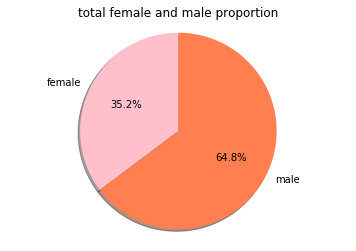

In [11]:

#
# 打印出整条船上的旅客中女性的数量的比例的饼状图
#
labels=['female','male']
colors=["pink","coral"]
data=[total_female_proportion,1-total_female_proportion]
plt.pie(data,labels=labels,colors=colors,
                                labeldistance = 1.1,autopct = '%3.1f%%',shadow = True,
                                startangle = 90,pctdistance = 0.6)
plt.title('total female and male proportion')

plt.axis('equal')

Text(0.5,1,' female and male surviers proportion')

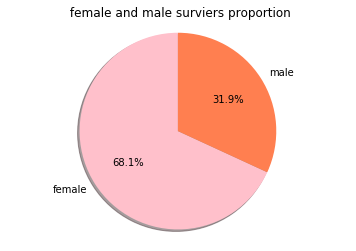

In [12]:

#
# 打印出整幸存者中女性的数量的比例的饼状图
#
survived_female_proportion=(df_survived[df_survived['Sex']=='female']).shape[0]/(df_survived.shape[0])
data=[survived_female_proportion,1-survived_female_proportion]
plt.pie(data,labels=labels,colors=colors,
                                labeldistance = 1.1,autopct = '%3.1f%%',shadow = True,
                                startangle = 90,pctdistance = 0.6)
plt.axis('equal')
plt.title(' female and male surviers proportion')

Text(0,0.5,'female popolulation proportion')

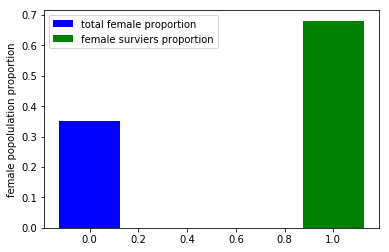

In [9]:

X = np.arange(1)
plt.bar(X , total_female_proportion, color = 'b', width = 0.25,label='total female proportion')
plt.bar(X +1, survived_female_proportion, color = 'g', width = 0.25,label='female surviers proportion')
plt.legend()

plt.ylabel('female popolulation proportion')

# 从上图可以看到幸存者中的女性的比例大于 船上旅客中女性的比例 的两倍左右

# 但是不排除这是女性的年龄段，船舱等级等因素造成的，继续分析

In [10]:
#
# 整条船上每个pclass中旅客数量的比例
#
total_pclass_proportion=(df.groupby("Pclass")['PassengerId'].count()/(df['PassengerId'].count()))
#
# 幸存者中每个pclass中旅客的数量的比例
#
survived_pclass_proportion=(df_survived.groupby("Pclass")['PassengerId'].count()/(df_survived['PassengerId'].count()))

Text(0,0.5,'pclass passengers  proportion')

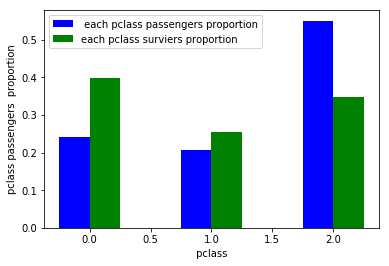

In [11]:
X = np.arange(3)
plt.bar(X - 0.125, total_pclass_proportion, color = 'b', width = 0.25,label=' each pclass passengers proportion')
plt.bar(X + 0.125, survived_pclass_proportion, color = 'g', width = 0.25,label='each pclass surviers proportion')
plt.legend()
plt.xlabel(' pclass ')
plt.ylabel('pclass passengers  proportion')

从上图可以看到
pclass 1中的幸存者的的比例大于 pclass 1 乘客占船上旅客的比例
pclass 2中的幸存者的的比例略大于 pclass 2 乘客占船上旅客的比例   
pclass 3中的幸存者的的比例小于 pclass 3 乘客占船上旅客的比例

查阅资料可以知道 救生艇是在pclass 1 甲板上的，所以这个结果符合预期



逃生时成年人无疑比 老年人和未成年人有优势，所以我们要单独分析 灾难前后这两组的比例

In [12]:
#
# 在CSV data中增加age_group 
#对于14岁以下，50岁以上 逃生时明显需要成年人(adult)帮助
#
df['age_group']='child'
df_survived['age_group']='child'

In [13]:
#####################################
# convert_age_group                 #
#####################################
#
## 计算 age 对应的age_group
#
def convert_age_group(age):
    if(age<=14):
        return 'child'
    if(age<=50):
        return 'adult'
    else:
        return 'senior citizen'

In [14]:
#####################################
# convert_age                 #
#####################################
#
## 从 DataFrame 中计算 age 对应的age_group,返回age_group series
#
def convert_age(age_group):
    return age_group.map(convert_age_group)

In [15]:
#
# 将DataFrame 中的Age 列 映射到 age_group列
#
df['age_group']=convert_age(df['Age'])
df_survived['age_group']=convert_age(df['Age'])

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,adult


In [17]:
#
# 整条船上每个age_group中旅客数量的比例
#
total_age_group_proportion=(df.groupby("age_group")['PassengerId'].count()/(df['PassengerId'].count()))
#
# 幸存者中每个age_group中旅客的数量的比例
#
survived_age_group_proportion=(df_survived.groupby("age_group")['PassengerId'].count()/(df_survived['PassengerId'].count()))

Text(0,0.5,'age_group passengers  proportion')

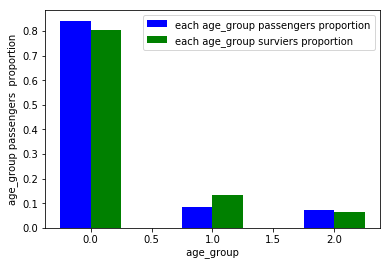

In [18]:
X = np.arange(3)
plt.bar(X -0.125, total_age_group_proportion, color = 'b', width = 0.25,label='each age_group passengers proportion')
plt.bar(X +0.125, survived_age_group_proportion, color = 'g', width = 0.25,label='each age_group surviers proportion')
plt.legend()
plt.xlabel(' age_group ')
plt.ylabel('age_group passengers  proportion')

由上图可以看到在灾难 前后,每个age group 中人数所占的比例相差不大

# 双变量分析

# 由上可知
女性 的性别 与 幸存概率 是正相关的
pclass 与 幸存概率 是负相关的

# 综合考虑性别 & pclass  对 幸存概率的影响

In [19]:
#####################################
# comput_proportion                 #
#####################################

## 从 DataFrame 中计算 col_2 对应的每个值占col_1的每个值的比例，返回比例构成的DF
def compute_proportion(df,col_1,col_2):
    unique_value_in_col_1=pd.unique(df.loc[:,col_1])
    unique_value_in_col_2=pd.unique(df.loc[:,col_2])
    proportion_df=pd.DataFrame(index=unique_value_in_col_1,columns=unique_value_in_col_2)
    for i in unique_value_in_col_1:
        for j in unique_value_in_col_2:
            col_1_count=((df[df.loc[:,col_1]==i]).count())['PassengerId']
            #col_2_count_meanwhile_col_1_count=(((df[df.loc[:,col_1]==i]).loc[:,col_2]==j).count())#['PassengerId']
            col_2_count_meanwhile_col_1_count=((df[df.loc[:,col_1]==i])[(df[df.loc[:,col_1]==i]).loc[:,col_2]==j]).count()['PassengerId']
            #print (col_1_count)
            #print ((df[df.loc[:,col_1]==i])[(df[df.loc[:,col_1]==i]).loc[:,col_2]==j])
            #print (col_2_count_meanwhile_col_1_count)
            proportion_df.loc[i,j]=col_2_count_meanwhile_col_1_count/col_1_count
    return proportion_df

In [20]:
#
# 打印出船上每个Pclass中男性和女性的数量的比例
#
df_pclass_sex_proportion=compute_proportion(df,'Pclass','Sex')
df_pclass_sex_proportion=df_pclass_sex_proportion.loc[[1,2,3],['female','male']] 
df_pclass_sex_proportion

,female,male
1,0.435185,0.564815
2,0.413043,0.586957
3,0.293279,0.706721


In [21]:
#
# 打印出幸存者中每个Pclass中男性和女性的数量的比例
#
df_surveved_pclass_sex_proportion=compute_proportion(df_survived,'Pclass','Sex')
df_surveved_pclass_sex_proportion=df_surveved_pclass_sex_proportion.loc[[1,2,3],['female','male']] 
df_surveved_pclass_sex_proportion

,female,male
1,0.669118,0.330882
2,0.804598,0.195402
3,0.605042,0.394958


Text(0,0.5,'age_group passengers  proportion')

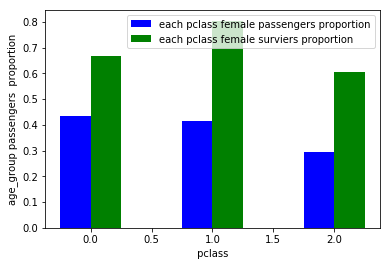

In [22]:
X = np.arange(3)
plt.bar(X -0.125, df_pclass_sex_proportion.female, color = 'b', width = 0.25,label='each pclass female passengers proportion')
plt.bar(X +0.125, df_surveved_pclass_sex_proportion.female, color = 'g', width = 0.25,label='each pclass female surviers proportion')
plt.legend()
plt.xlabel(' pclass ')
plt.ylabel('age_group passengers  proportion')

我们可以看出,三个等级的船舱中，登船旅客中女性的比例都要小于0.5，但是幸存者中 三个船舱的女性幸存者的比例都要高于0.5

比如在pclass 3中 幸存的概率最小,但是这也丝毫没有影响pclass 3 幸存者中女性占了大多数

# 综合考虑 性别 & age_group  对 幸存概率的影响

In [23]:
#
# 打印出船上每个age_group 中男性和女性的数量的比例
#
df_age_group_sex_proportion=compute_proportion(df,'age_group','Sex')
df_age_group_sex_proportion=df_age_group_sex_proportion.loc[['child','adult','senior citizen'],['female','male']] 
df_age_group_sex_proportion

,female,male
child,0.493506,0.506494
adult,0.345333,0.654667
senior citizen,0.265625,0.734375


In [24]:
#
# 打印出船上幸存者中每个age_group 中男性和女性的数量的比例
#
df_surveved_age_group_sex_proportion=compute_proportion(df_survived,'age_group','Sex')
df_surveved_age_group_sex_proportion=df_surveved_age_group_sex_proportion.loc[['child','adult','senior citizen'],['female','male']] 
df_surveved_age_group_sex_proportion

,female,male
child,0.533333,0.466667
adult,0.701818,0.298182
senior citizen,0.727273,0.272727


Text(0,0.5,'age_group female passengers  proportion')

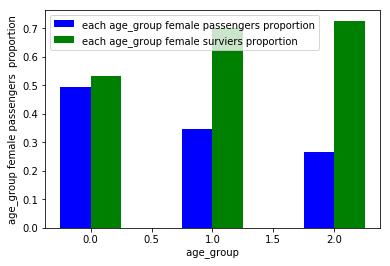

In [25]:
X = np.arange(3)
plt.bar(X -0.125, df_age_group_sex_proportion.female, color = 'b', width = 0.25,label='each age_group female passengers proportion')
plt.bar(X +0.125, df_surveved_age_group_sex_proportion.female, color = 'g', width = 0.25,label='each age_group female surviers proportion')
plt.legend()
plt.xlabel(' age_group ')
plt.ylabel('age_group female passengers  proportion')

由上图可以看出,在灾难发生前后,'adult','senior citizen'中的女性的比例都有增加

child 的比例增加的不多，在常识里，让child先上船时并不会对 男孩和女孩加以区分

# 综合考虑 pclass & age_group  对 幸存概率的影响

In [26]:
#
# 打印出船上每个pclass 中age_group的比例
#
df_pclass_age_group_proportion=compute_proportion(df,'Pclass','age_group')
df_pclass_age_group_proportion=df_pclass_age_group_proportion.loc[[1,2,3],['child','adult','senior citizen']] 
df_pclass_age_group_proportion

,child,adult,senior citizen
1,0.0231481,0.796296,0.180556
2,0.103261,0.815217,0.0815217
3,0.107943,0.87169,0.0203666


In [27]:
#
# 打印出幸存者中每个pclass 中age_group的比例
#
df_survived_pclass_age_group_proportion=compute_proportion(df_survived,'Pclass','age_group')
df_survived_pclass_age_group_proportion=df_survived_pclass_age_group_proportion.loc[[1,2,3],['child','adult','senior citizen']] 
df_survived_pclass_age_group_proportion

,child,adult,senior citizen
1,0.0294118,0.838235,0.132353
2,0.218391,0.747126,0.0344828
3,0.184874,0.806723,0.00840336


Text(0,0.5,'pclass child  proportion')

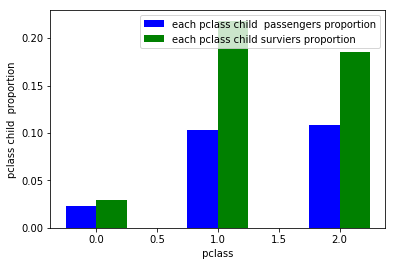

In [28]:
X = np.arange(3)
plt.bar(X -0.125, df_pclass_age_group_proportion.child, color = 'b', width = 0.25,label='each pclass child  passengers proportion')
plt.bar(X +0.125, df_survived_pclass_age_group_proportion.child, color = 'g', width = 0.25,label='each pclass child surviers proportion')
plt.legend()
plt.xlabel(' pclass ')
plt.ylabel('pclass child  proportion')

可以看出灾难发生前后，每个pclass 的child的比例都上升了

Text(0,0.5,'pclass adult  proportion')

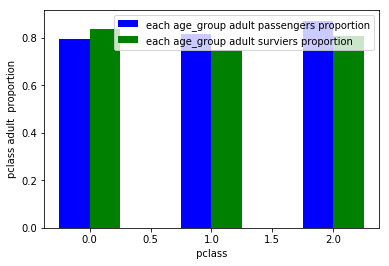

In [29]:
X = np.arange(3)
plt.bar(X -0.125, df_pclass_age_group_proportion.adult, color = 'b', width = 0.25,label='each age_group adult passengers proportion')
plt.bar(X +0.125, df_survived_pclass_age_group_proportion.adult, color = 'g', width = 0.25,label='each age_group adult surviers proportion')
plt.legend()
plt.xlabel(' pclass ')
plt.ylabel('pclass adult  proportion')

可以看出灾难发生前后，每个pclass 的adult的比例都近似，没有变化

In [30]:
df_pclass_age_group_proportion['senior citizen']

1     0.180556
2    0.0815217
3    0.0203666
Name: senior citizen, dtype: object

In [31]:
df_survived_pclass_age_group_proportion['senior citizen']

1      0.132353
2     0.0344828
3    0.00840336
Name: senior citizen, dtype: object

Text(0,0.5,'pclass senior citizen  proportion')

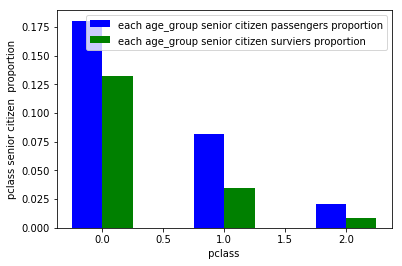

In [32]:
plt.bar(X -0.125, df_pclass_age_group_proportion['senior citizen'], color = 'b', width = 0.25,label='each age_group senior citizen passengers proportion')
plt.bar(X +0.125, df_survived_pclass_age_group_proportion['senior citizen'], color = 'g', width = 0.25,label='each age_group senior citizen surviers proportion')
plt.legend()
plt.xlabel(' pclass ')
plt.ylabel('pclass senior citizen  proportion')

从上图可以看出，在灾难发生前后,'senior citizen'比例下降了

 pclass & age_group  对 幸存概率的影响 在不同年龄段呈现不同的趋势， 并不能帮助 我们很好的分析 性别与乘客幸存的机率的相关性

#    # 综合考虑  sex & Pclass & age_group 对幸存机率的影响

# # pclass==1

In [36]:
#
# 打印出船上pclass 1 中各年龄段中性别的比例
#
df_pclass_1_agegroup_sexual_proportion=compute_proportion(df[df.Pclass==1],'age_group','Sex')
df_pclass_1_agegroup_sexual_proportion=df_pclass_1_agegroup_sexual_proportion.loc[['child','adult','senior citizen'],['female','male']] 
df_pclass_1_agegroup_sexual_proportion

,female,male
child,0.4,0.6
adult,0.459302,0.540698
senior citizen,0.333333,0.666667


In [38]:
#
# 打印出幸存者中pclass 1 中各年龄段中性别的比例
#
df_pclass_1_surviver_agegroup_sexual_proportion=compute_proportion(df_survived[df_survived.Pclass==1],'age_group','Sex')
df_pclass_1_surviver_agegroup_sexual_proportion=df_pclass_1_surviver_agegroup_sexual_proportion.loc[['child','adult','senior citizen'],['female','male']]
df_pclass_1_surviver_agegroup_sexual_proportion

,female,male
child,0.25,0.75
adult,0.675439,0.324561
senior citizen,0.722222,0.277778


Text(0.5,1,'pclass_1_female_proportion')

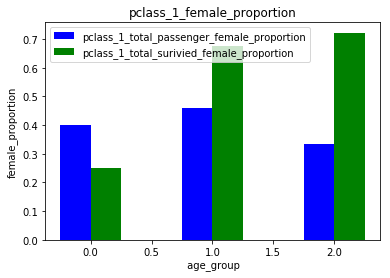

In [54]:
#
# 打印出pclass 1 中幸存者与整体旅客中女性逃生的比例的柱状图对比
#
plt.bar(X -0.125, df_pclass_1_agegroup_sexual_proportion['female'], color = 'b', width = 0.25,
        label='pclass_1_total_passenger_female_proportion')
plt.bar(X +0.125, df_pclass_1_surviver_agegroup_sexual_proportion['female'], color = 'g', width = 0.25,
        label='pclass_1_total_surivied_female_proportion')

plt.legend()
plt.xlabel(' age_group')
plt.ylabel('female_proportion')
plt.title('pclass_1_female_proportion')

从图中来看，adult 和 senior citizen 都和之前的分析吻合 ,pclass 1 幸存者中女性的比例都比旅客中的女性比例要高

child却不同下面分析Pclass中的child

In [55]:
#
# 打印出旅客中pclass 1 中child的逃生情况
#
df_child=df[df.age_group=='child']
df_child_pclass_1=df_child[df_child.Pclass==1]
df_child_pclass_1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,age_group
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,child
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,child
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.00,1,2,child
445,446,1,1,"Dodge, Master. Washington",male,4.00,0,2,child
802,803,1,1,"Carter, Master. William Thornton II",male,11.00,1,2,child


从结果来看，因为child的样本数比较小，而且存活率为80%，唯一一个去世的child 为female，
所以才导致了在Pclass ==1中 child 里 female的幸存者比例的降低

#  pclass==2

In [51]:
#
# 打印出船上pclass 2中各年龄段中性别的比例
#
df_pclass_2_agegroup_sexual_proportion=compute_proportion(df[df.Pclass==2],'age_group','Sex')
df_pclass_2_agegroup_sexual_proportion=df_pclass_2_agegroup_sexual_proportion.loc[['child','adult','senior citizen'],['female','male']] 
df_pclass_2_agegroup_sexual_proportion

,female,male
child,0.526316,0.473684
adult,0.42,0.58
senior citizen,0.2,0.8


In [52]:
#
# 打印出幸存者中pclass 1 中各年龄段中性别的比例
#
df_pclass_2_surviver_agegroup_sexual_proportion=compute_proportion(df_survived[df_survived.Pclass==2],'age_group','Sex')
df_pclass_2_surviver_agegroup_sexual_proportion=df_pclass_2_surviver_agegroup_sexual_proportion.loc[['child','adult','senior citizen'],['female','male']]
df_pclass_2_surviver_agegroup_sexual_proportion

,female,male
child,0.526316,0.473684
adult,0.892308,0.107692
senior citizen,0.666667,0.333333


In [ ]:
#
# 打印出pclass 2 中幸存者与整体旅客 中 女性逃生的比例的柱状图对比
#
plt.bar(X -0.125, df_pclass_2_agegroup_sexual_proportion['female'], color = 'b', width = 0.25,
        label='pclass_2_total_passenger_female_proportion')
plt.bar(X +0.125, df_pclass_2_surviver_agegroup_sexual_proportion['female'], color = 'g', width = 0.25,
        label='pclass_2_total_surivied_female_proportion')

plt.legend()
plt.xlabel(' pclass ')
plt.ylabel('pclass senior citizen  proportion')
plt.title('pclass_2_female_proportion')

# 但是会不会是因为pclass1 中女性的数量大，才导致最后幸存者中女性的数量多呢？

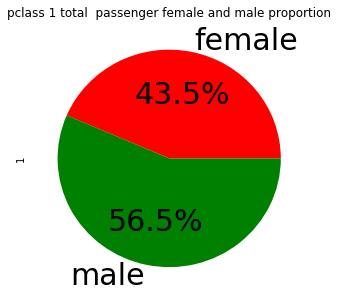

In [46]:
#
# 打印出船上pclass 1 中的旅客女性的数量的比例的饼状图
#
(df_pclass_sex_proportion.loc[1]).plot.pie(autopct='%1.1f%%',fontsize=30,figsize=(5, 5),colors=['r', 'g'],
                                           title='pclass 1 total  passenger female and male proportion')

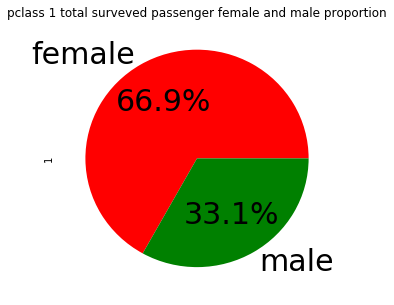

In [47]:
#
# 打印出幸存者中pclass 1 中的旅客女性的数量的比例的饼状图
#
(df_surveved_pclass_sex_proportion.loc[1]).plot.pie(autopct='%1.1f%%',fontsize=30,figsize=(5, 5),colors=['r', 'g'],
                                           title='pclass 1 total surveved passenger female and male proportion')

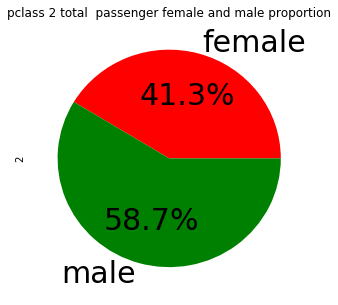

In [48]:
#
# 打印出船上pclass 2 中的旅客女性的数量的比例的饼状图
#
(df_pclass_sex_proportion.loc[2]).plot.pie(autopct='%1.1f%%',fontsize=30,figsize=(5, 5),colors=['r', 'g'],
                                           title='pclass 2 total  passenger female and male proportion')

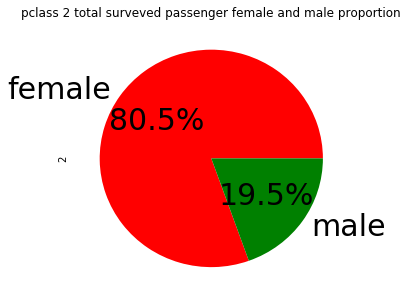

In [49]:
#
# 打印出幸存者中pclass 2 中的旅客女性的数量的比例的饼状图
#
(df_surveved_pclass_sex_proportion.loc[2]).plot.pie(autopct='%1.1f%%',fontsize=30,figsize=(5, 5),colors=['r', 'g'],
                                           title='pclass 2 total surveved passenger female and male proportion')

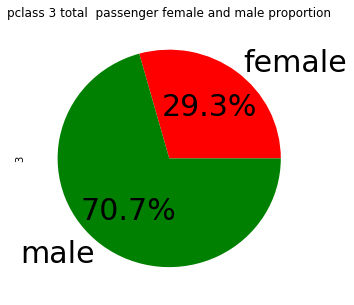

In [50]:
#
# 打印出船上pclass 3 中的旅客女性的数量的比例的饼状图
#
(df_pclass_sex_proportion.loc[3]).plot.pie(autopct='%1.1f%%',fontsize=30,figsize=(5, 5),colors=['r', 'g'],
                                           title='pclass 3 total  passenger female and male proportion')

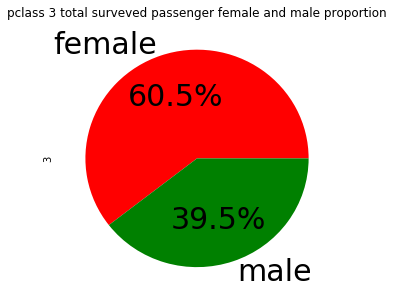

In [51]:
#
# 打印出幸存者中pclass 3 中的旅客女性的数量的比例的饼状图
#
(df_surveved_pclass_sex_proportion.loc[3]).plot.pie(autopct='%1.1f%%',fontsize=30,figsize=(5, 5),colors=['r', 'g'],
                                           title='pclass 3 total surveved passenger female and male proportion')

# 从结果来看三个等级的船舱中，登船旅客中女性的比例都要少于男性，但是幸存者中 三个船舱的女性幸存者的比例都要高于男性

下面继续分析年龄是否对我们的分析造成了干扰

In [52]:
#
# 在CSV data中增加age_group 
#对于14岁以下，50岁以上 逃生时明显需要成年人(adult)帮助
#
df['age_group']='child'
df_survived['age_group']='child'

In [53]:
#####################################
# convert_age_group                 #
#####################################
#
## 计算 age 对应的age_group
#
def convert_age_group(age):
    if(age<=14):
        return 'child'
    if(age<=50):
        return 'adult'
    else:
        return 'senior citizen'

In [54]:
#####################################
# convert_age                 #
#####################################
#
## 从 DataFrame 中计算 age 对应的age_group,返回age_group series
#
def convert_age(age_group):
    return age_group.map(convert_age_group)

In [55]:
#
# 将DataFrame 中的Age 列 映射到 age_group列
#
df['age_group']=convert_age(df['Age'])
df_survived['age_group']=convert_age(df['Age'])

In [56]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,adult


# 先看Pclass==1

In [57]:
#
# 打印出船上pclass 1 中各年龄段中性别的比例
#
df_pclass_1_agegroup_sexual_proportion=compute_proportion(df[df.Pclass==1],'age_group','Sex')
df_pclass_1_agegroup_sexual_proportion

,female,male
adult,0.459302,0.540698
senior citizen,0.333333,0.666667
child,0.4,0.6


In [58]:
#
# 打印出幸存者中pclass 1 中各年龄段中性别的比例
#
df_pclass_1_surviver_agegroup_sexual_proportion=compute_proportion(df_survived[df_survived.Pclass==1],'age_group','Sex')
df_pclass_1_surviver_agegroup_sexual_proportion

,female,male
adult,0.675439,0.324561
senior citizen,0.722222,0.277778
child,0.25,0.75


Text(0.5,1,'pclass_1_female_proportion')

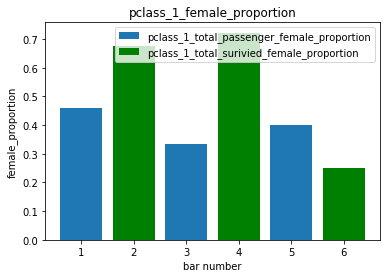

In [59]:
#
# 打印出pclass 1 中幸存者与整体旅客 中 女性逃生的比例的柱状图对比
#
plt.bar([1,3,5],list(df_pclass_1_agegroup_sexual_proportion.loc[:,'female']), label="pclass_1_total_passenger_female_proportion")
plt.bar([2,4,6],list(df_pclass_1_surviver_agegroup_sexual_proportion.loc[:,'female']), label="pclass_1_total_surivied_female_proportion", color='g')
plt.legend()
plt.xlabel('bar number')
plt.ylabel('female_proportion')
plt.title('pclass_1_female_proportion')

从上边两个表中来看，adult 和 senior citizen 都和之前的分析吻合 ,幸存者中女性的比例都比所有旅客中的女性比例要高

child却不同下面分析Pclass中的child

In [60]:
#
# 打印出旅客中pclass 1 中child的逃生情况
#
df_child=df[df.age_group=='child']
df_child_pclass_1=df_child[df_child.Pclass==1]
df_child_pclass_1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,age_group
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,child
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,child
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.00,1,2,child
445,446,1,1,"Dodge, Master. Washington",male,4.00,0,2,child
802,803,1,1,"Carter, Master. William Thornton II",male,11.00,1,2,child


从结果来看，因为child的样本数比较小，而且存活率为80%，唯一一个去世的child 为female，
所以才导致了在Pclass ==1中 child 里 female的幸存都比例的降低

# Pclass==2

In [61]:
#
# 打印出船上pclass 2 中各年龄段中性别的比例
#
df_pclass_2_agegroup_sexual_proportion=compute_proportion(df[df.Pclass==2],'age_group','Sex')
df_pclass_2_agegroup_sexual_proportion

,female,male
child,0.526316,0.473684
senior citizen,0.2,0.8
adult,0.42,0.58


In [62]:
#
# 打印出幸存者中pclass 2 中各年龄段中性别的比例
#
df_pclass_2_surviver_agegroup_sexual_proportion=compute_proportion(df_survived[df_survived.Pclass==2],'age_group','Sex')
df_pclass_2_surviver_agegroup_sexual_proportion

,female,male
child,0.526316,0.473684
senior citizen,0.666667,0.333333
adult,0.892308,0.107692


Text(0.5,1,'pclass_2_female_proportion')

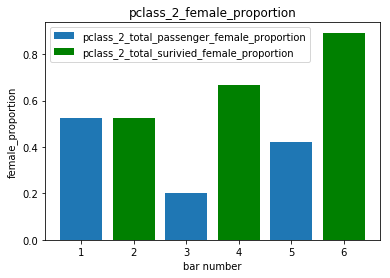

In [63]:
#
# 打印出pclass 2 中幸存者与整体旅客 中 女性逃生的比例的柱状图对比
#
plt.bar([1,3,5],list(df_pclass_2_agegroup_sexual_proportion.loc[:,'female']), label="pclass_2_total_passenger_female_proportion")
plt.bar([2,4,6],list(df_pclass_2_surviver_agegroup_sexual_proportion.loc[:,'female']), label="pclass_2_total_surivied_female_proportion", color='g')
plt.legend()
plt.xlabel('bar number')
plt.ylabel('female_proportion')
plt.title('pclass_2_female_proportion')

pclass 2中的 幸存者中的女性幸存者的比例 也要高于原pclass 3 中整体旅客中各年龄段的女性比例

Pclass==2 中旅客和幸存者中  child 的性别的比例是一样的，我们打印出来观察一下

In [64]:
#
# 打印出旅客中pclass 2 中child的逃生情况
#
df_child_pclass_2=df_child[df_child.Pclass==2]
df_child_pclass_2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,age_group
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,child
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,child
58,59,1,2,"West, Miss. Constance Mirium",female,5.00,1,2,child
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,child
183,184,1,2,"Becker, Master. Richard F",male,1.00,2,1,child
193,194,1,2,"Navratil, Master. Michel M",male,3.00,1,1,child
237,238,1,2,"Collyer, Miss. Marjorie ""Lottie""",female,8.00,0,2,child
340,341,1,2,"Navratil, Master. Edmond Roger",male,2.00,1,1,child
407,408,1,2,"Richards, Master. William Rowe",male,3.00,1,1,child
446,447,1,2,"Mellinger, Miss. Madeleine Violet",female,13.00,0,1,child


awesome!!! 所以的child都幸存了！！

# Pclass==3

In [65]:
#
# 打印出船上pclass 3 中各年龄段中性别的比例
#
df_pclass_3_agegroup_sexual_proportion=compute_proportion(df[df.Pclass==3],'age_group','Sex')
df_pclass_3_agegroup_sexual_proportion

,male,female
adult,0.726636,0.273364
child,0.509434,0.490566
senior citizen,0.9,0.1


In [66]:
#
# 打印出幸存者中pclass 3 中各年龄段中性别的比例
#
df_pclass_3_surviver_agegroup_sexual_proportion=compute_proportion(df_survived[df_survived.Pclass==3],'age_group','Sex')
df_pclass_3_surviver_agegroup_sexual_proportion

,female,male
adult,0.604167,0.395833
child,0.590909,0.409091
senior citizen,1,0


Text(0.5,1,'pclass_3_female_proportion')

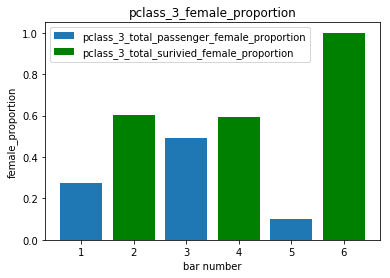

In [67]:
#
# 打印出pclass 3 中幸存者与整体旅客 中 女性逃生的比例的柱状图对比
#
plt.bar([1,3,5],list(df_pclass_3_agegroup_sexual_proportion.loc[:,'female']), label="pclass_3_total_passenger_female_proportion")
plt.bar([2,4,6],list(df_pclass_3_surviver_agegroup_sexual_proportion.loc[:,'female']), label="pclass_3_total_surivied_female_proportion", color='g')
plt.legend()
plt.xlabel('bar number')
plt.ylabel('female_proportion')
plt.title('pclass_3_female_proportion')

pclass 3中的 幸存者中的女性幸存者的比例 也要高于原pclass 3 中整体旅客中的女性比例

# 所以综合以上分析，我们可以得到结论，在轮船沉没过程时，登上救生艇的过程中确实做到了女性优先

# 以上分析只表明性别因素对逃生的成功率有影响，非常有可能存在其它因素，比如船舱的位置离救生船的距离，女性旅客基本上都是以家庭为单位旅行 等其它因素